In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('tennis.csv')

In [ ]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
df.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [ ]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [ ]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


Since the all the attributes including target are categorical we will go with encoding them

In [ ]:
df_encoded = df
columns_to_encode = ['outlook', 'temp', 'humidity', 'windy']
le = LabelEncoder()
for column in columns_to_encode:
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [ ]:
x = df_encoded.drop('play', axis=1)
y = df_encoded['play']

In [ ]:
df_encoded

,outlook,temp,humidity,windy,play
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes
5,1,0,1,1,no
6,0,0,1,1,yes
7,2,2,0,0,no
8,2,0,1,0,yes
9,1,2,1,0,yes


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
data_unpruned =DecisionTreeClassifier(max_depth=None, random_state=42)
data_model = data_unpruned.fit(x_train, y_train)
print("Performance without pruning:", data_model.score(x_test, y_test)) #model is perfect with no pruning required
print("At depth:", data_model.tree_.max_depth)

Performance without pruning: 1.0
At depth: 4


In [ ]:
#fit model
clf = DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

In [ ]:
data_model

DecisionTreeClassifier(random_state=42)

In [ ]:
print(data_model.score(x_train,y_train))
print(data_model.score(x_test,y_test))

1.0
1.0


In [ ]:
y_pred=data_model.predict(x_test)
print(y_test)
print(y_pred)

9     yes
11    yes
0      no
Name: play, dtype: object
['yes' 'yes' 'no']


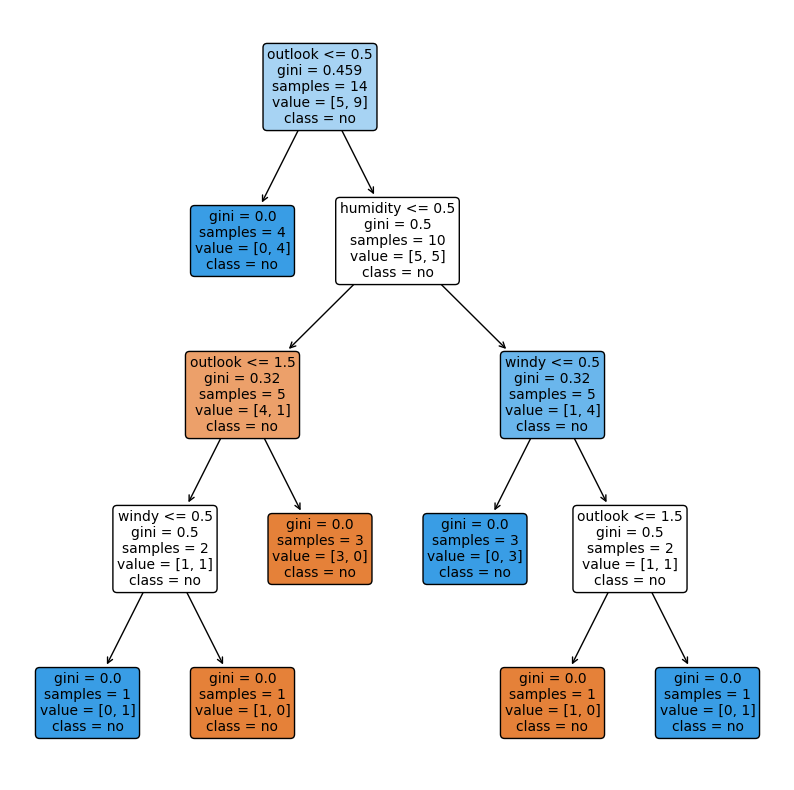

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
a = plot_tree(clf, feature_names=x.columns, class_names=y, filled=True, rounded=True, fontsize=10)

In [ ]:
#check accuracy
y_pred = data_unpruned.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"accuracy : {accuracy}")

accuracy : 100.0


In [ ]:
#print confusion matrix
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 2]])